In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing, model_selection
import missingno as msno

In [22]:
# Data importation
wvs_path = "data//WVS_Time_Series_1981-2022_csv_v5_0.csv"
df = pd.read_csv(wvs_path)
df.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN


In [23]:
df.replace([-1,-2,-3,-4,-5],np.nan,inplace=True)

In [24]:
df = df[["X025","X028","G006","E069_11","E069_06","E012"]]
df.head()

,X025,X028,G006,E069_11,E069_06,E012
0,3.0,6.0,2.0,2.0,3.0,1.0
1,4.0,6.0,2.0,3.0,3.0,1.0
2,2.0,NaN,2.0,3.0,3.0,NaN
3,3.0,1.0,3.0,2.0,2.0,0.0
4,2.0,NaN,2.0,3.0,3.0,NaN


<Axes: >

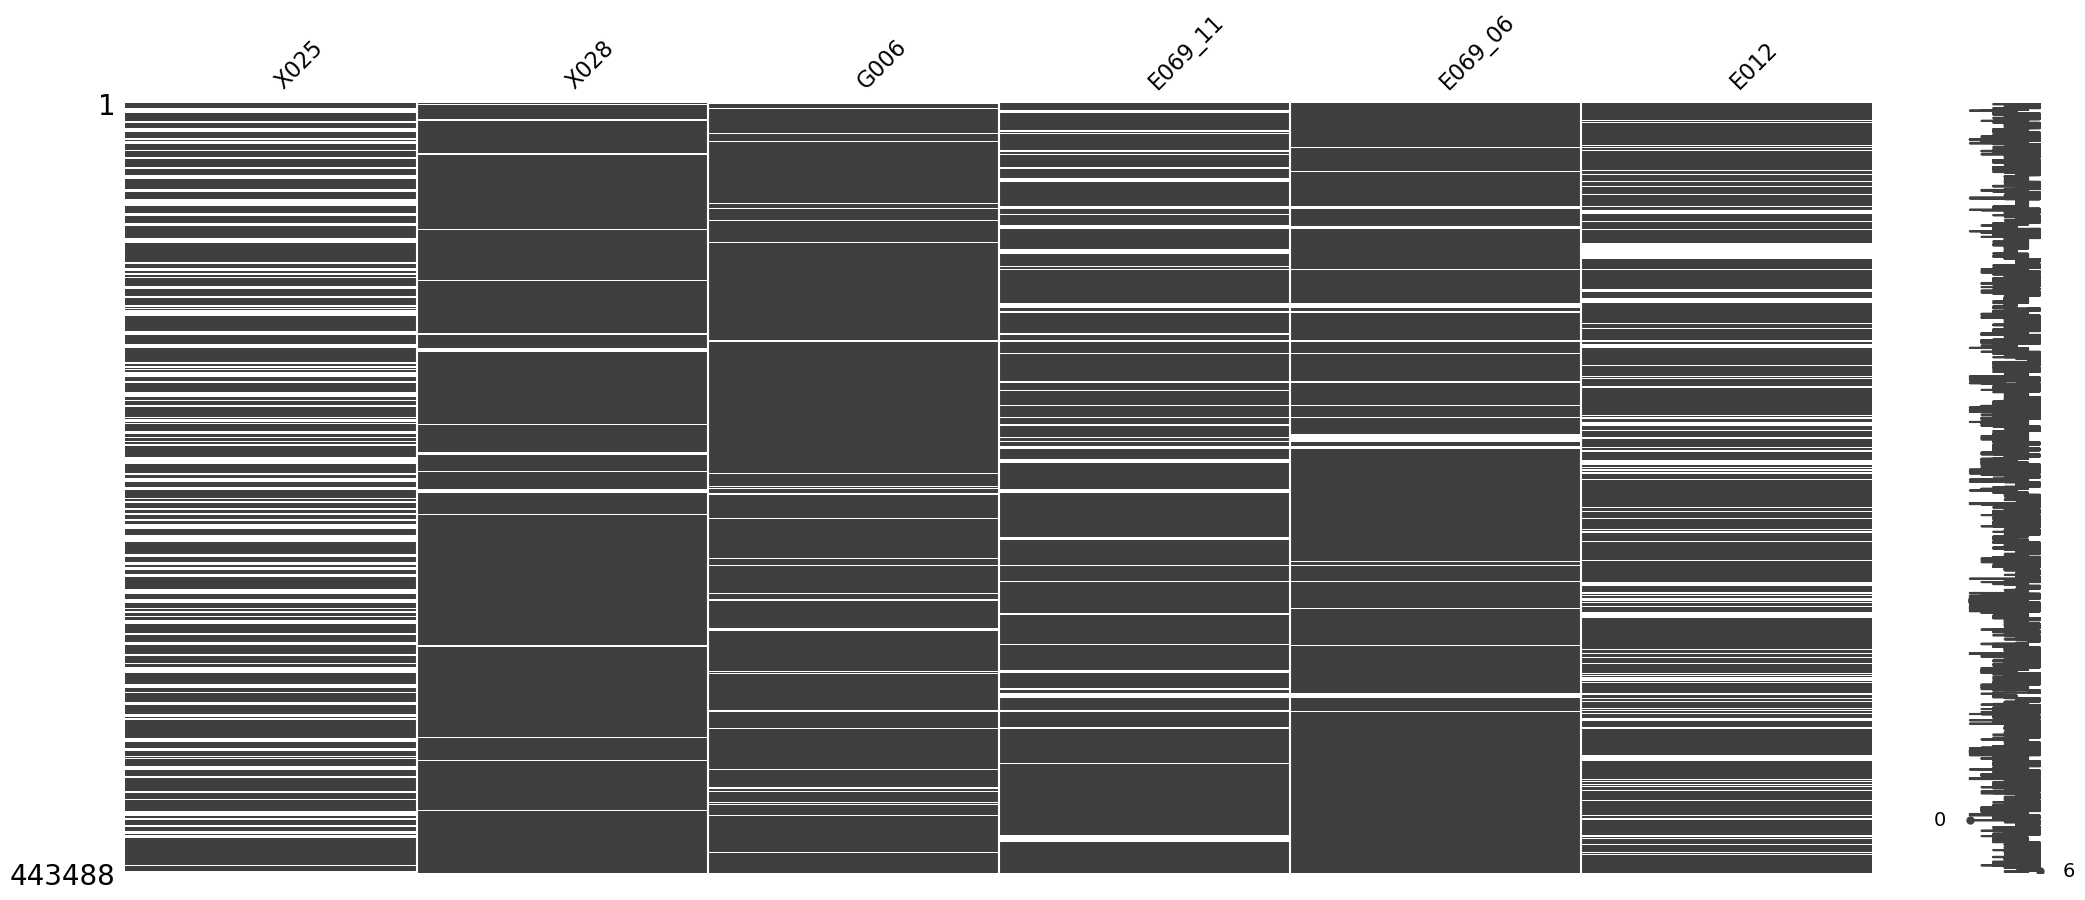

In [37]:
msno.matrix(df)

<Axes: >

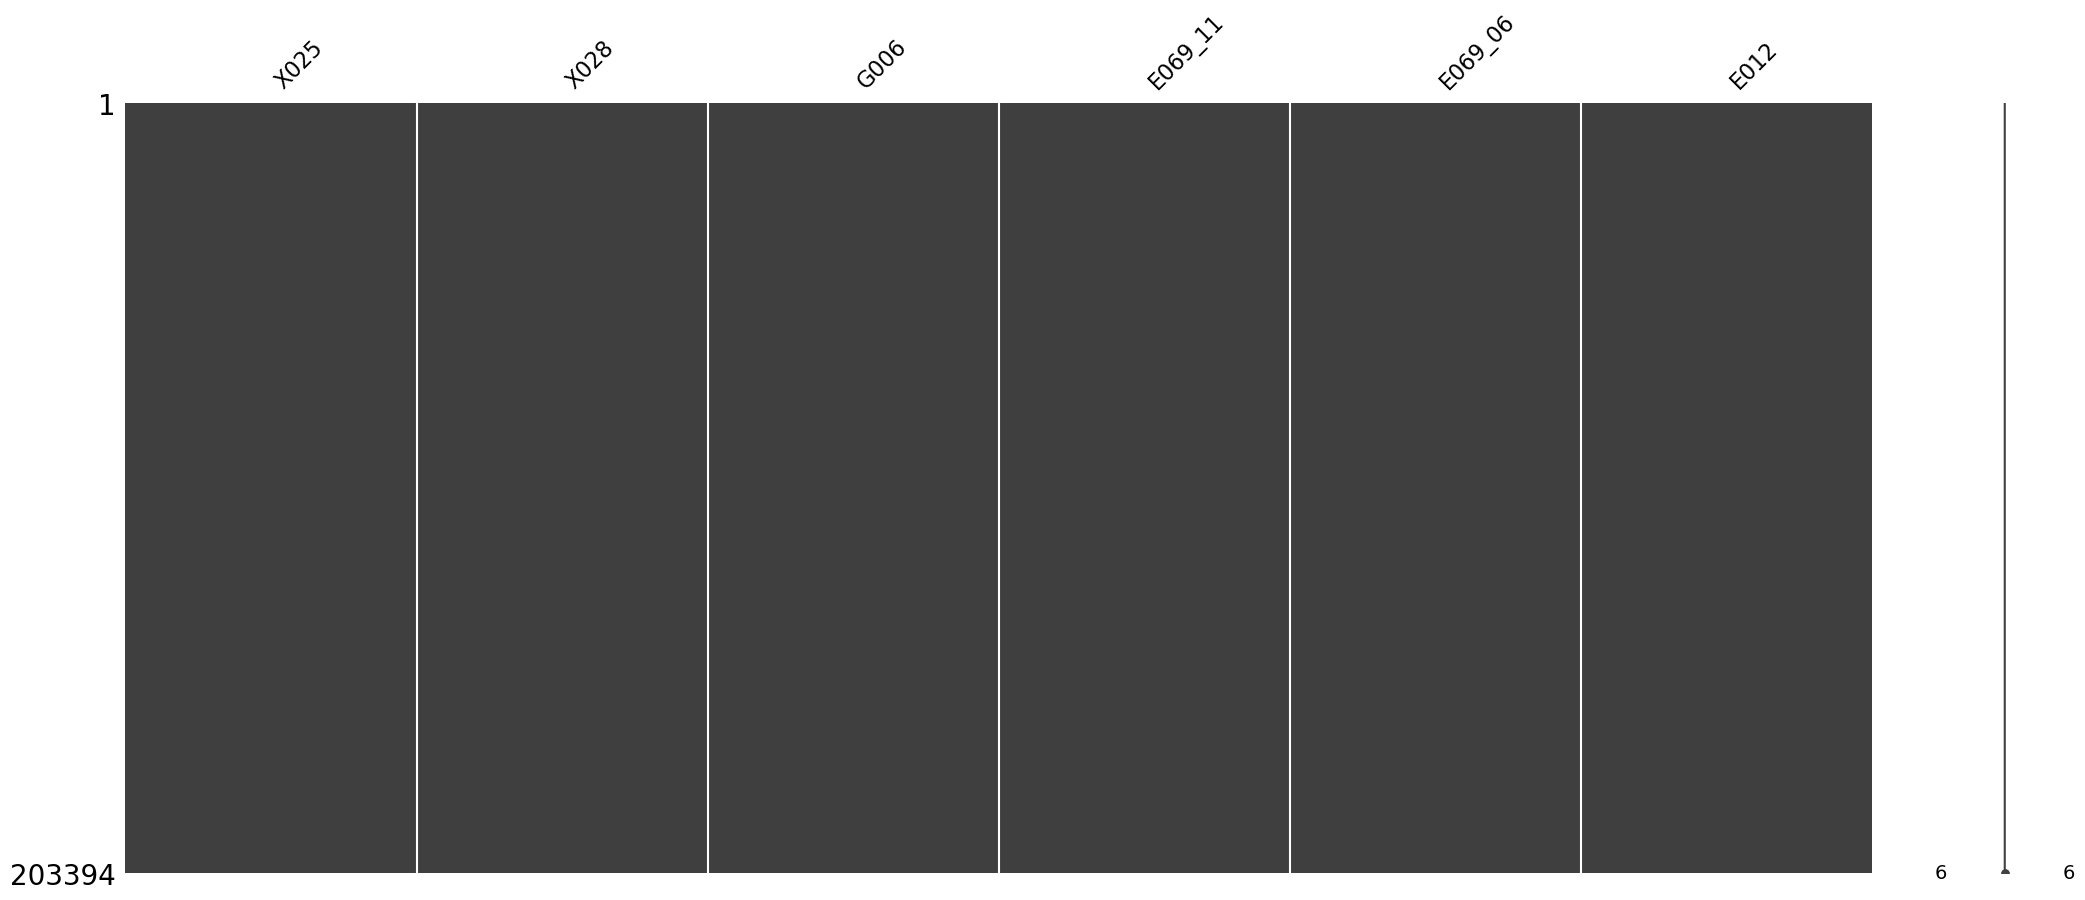

In [38]:
df_clean = df.dropna()
msno.matrix(df_clean)

In [39]:
df_clean = df_clean[["X025","X028","G006","E069_11","E069_06","E012"]].astype(int)

#### We want to find the parametres bi that maximizes the likelihood fucntion of the observed data. : formula using latex 
we use gradient descent for that , since there is no close form solution to do it  

In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# X = df.drop(columns='E012') 
# y = df["E012"]
# alpha = 0.1

def gradient_descent(X,y,alpha,epochs):
    beta = [0]*6 
    i=0
    X_with_ones = np.c_[np.ones((X.shape[0], 1)), X]
    while i < epochs:
        pi = sigmoid(X_with_ones@ beta)
        gradient = X_with_ones.T @ (pi - y)
        beta = beta - alpha * gradient 
        i+=1
    return beta

Use the values of beta to predict the target variable

In [ ]:
X = df_clean.drop(columns='E012')
X_with_ones = np.c_[np.ones((X.shape[0], 1)), X]
y = df_clean["E012"]

beta_est = gradient_descent(X, y, alpha=0.1, epochs=2000)

probabilities = sigmoid(X_with_ones@beta_est)
predictions = (probabilities >= 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Model Accuracy:", accuracy)

C:\Users\PC\AppData\Local\Temp\ipykernel_15472\960189548.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Model Accuracy: 0.685787191362577


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()

# Train the model on the entire dataset (or use train-test split if preferred)
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print("Scikit-learn Logistic Regression Accuracy:", accuracy)

Scikit-learn Logistic Regression Accuracy: 0.7293037159404899
